In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import bcubed
from sklearn.preprocessing import StandardScaler

# Load the dataset
dataset = "../Dataset/cleaned_student_performance.csv"
df = pd.read_csv(dataset)

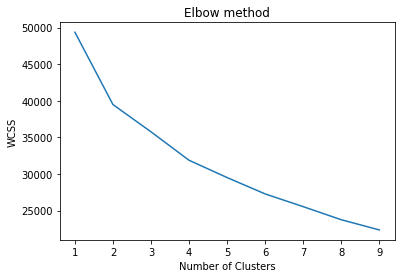

In [2]:
# True labels represent the ground truth performance index of the data.
true_labels = df['Performance Index']

# Features selected for clustering.
features = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']
data = df[features]

# Standardizing the data using StandardScaler to ensure all features have similar scales.
scaler = StandardScaler()
X = scaler.fit_transform(data)

# Applying KMeans clustering for a range of cluster values from 1 to 9.
kmeans_models = [KMeans (n_clusters=k, random_state=0, n_init=10).fit(X) for k in range (1, 10)]

# Calculating the within-cluster sum of squares (inertia) for each model.
innertia = [model.inertia_ for model in kmeans_models]

#By using Elbow method we have found that the three best number of clusters are 2, 3, and 4.
plt.plot (range(1, 10), innertia) 
plt.title('Elbow method') 
plt.xlabel('Number of Clusters') 
plt.ylabel('WCSS') # Within-Cluster Sum of Squares
plt.show()

In [3]:
def run_kmeans(X, k):
    
    # Fit K-means clustering model
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X)
    # Get cluster labels
    labels = kmeans.labels_

    # Compute Silhouette coefficient
    silhouette_coefficient = silhouette_score(X, labels)
    
    # Compute Within-Cluster Sum of Squares (WCSS)
    wcss = kmeans.inertia_
    
    # Create dictionaries for BCubed
    predicted_clusters = {i: {el for el, label in enumerate(labels) if label == i} for i in range(k)}
    true_clusters = {i: {el for el, label in enumerate(true_labels) if label == i} for i in np.unique(true_labels)}

    # Compute BCubed precision and recall
    bcubed_precision = bcubed.precision(predicted_clusters, true_clusters)
    bcubed_recall = bcubed.recall(predicted_clusters, true_clusters)

    # Print cluster report
    print(f"Cluster Report for K-means Clustering (k={k}):")
    print(f"Silhouette Coefficient: {silhouette_coefficient}")
    print(f"Total within-cluster sum of square: {wcss}")
    print(f"Precision: {bcubed_precision}")
    print(f"Recall: {bcubed_recall}")


    # Visualize clusters using PCA for dimensionality reduction
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(X)
    
    # Create a scatter plot with cluster assignments
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=labels, palette='viridis', s=50)
    plt.title(f'K-means Clustering (k={k})')
    plt.legend(title='Cluster')
    plt.show()

    return {
        'silhouette_coefficient': silhouette_coefficient,
        'wcss': wcss,
        'precision': bcubed_precision,
        'recall': bcubed_recall,
    }

Cluster Report for K-means Clustering (k=2):
Silhouette Coefficient: 0.20954002690334583
Total within-cluster sum of square: 39483.28398384829
Precision: 0.2542487288533123
Recall: 1.0


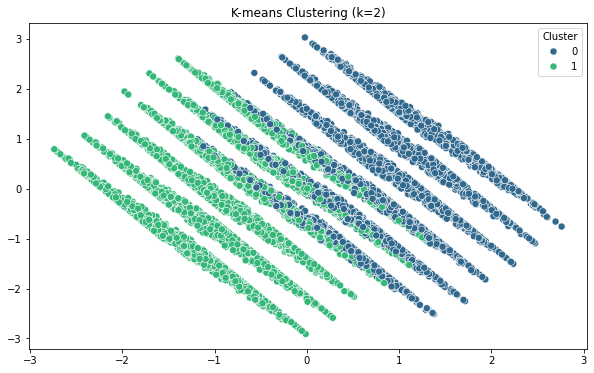

In [4]:
# Run K-means clustering with 2 clusters on the input data X
clusters_2 = run_kmeans(X, 2)

Cluster Report for K-means Clustering (k=3):
Silhouette Coefficient: 0.1695152579522669
Total within-cluster sum of square: 35757.54026871288
Precision: 0.5209743493343477
Recall: 0.9159030747301976


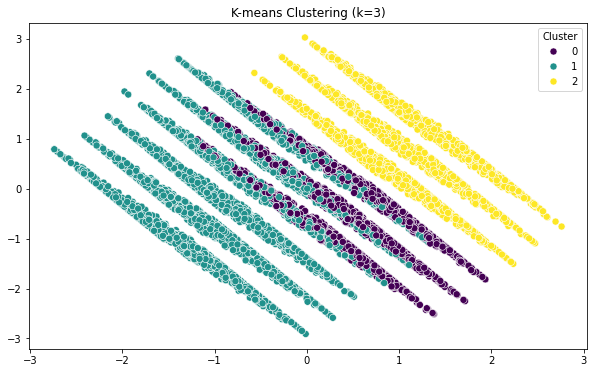

In [5]:
# Run K-means clustering with 3 clusters on the input data X
clusters_3 = run_kmeans(X, 3)

Cluster Report for K-means Clustering (k=4):
Silhouette Coefficient: 0.1781897546547201
Total within-cluster sum of square: 31871.158696254213
Precision: 0.7648831746503864
Recall: 0.9029910299109074


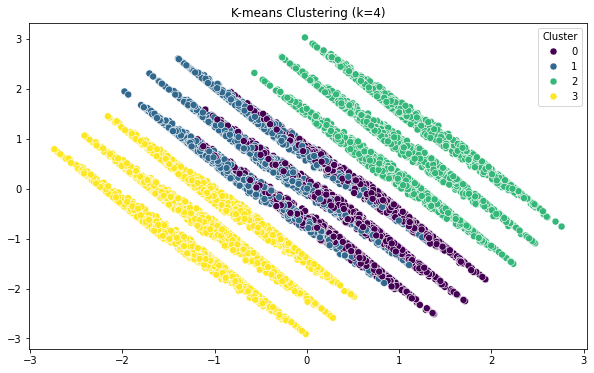

In [6]:
# Run K-means clustering with 4 clusters on the input data X
clusters_4 = run_kmeans(X, 4)

In [7]:
# Compare the different number of clusters
data = []
# Add data for K=2
data.append({
    'K': 2,
    'Silhouette Coefficient': clusters_2['silhouette_coefficient'],
    'Total Within-Cluster sum of square': clusters_2['wcss'],
    'Precision': clusters_2['precision'],
    'Recall': clusters_2['recall']
})

# Add data for K=3
data.append({
    'K': 3,
    'Silhouette Coefficient': clusters_3['silhouette_coefficient'],
    'Total Within-Cluster sum of square': clusters_3['wcss'],
    'Precision': clusters_3['precision'],
    'Recall': clusters_3['recall']
})

# Add data for K=4
data.append({
    'K': 4,
    'Silhouette Coefficient': clusters_4['silhouette_coefficient'],
    'Total Within-Cluster sum of square': clusters_4['wcss'],
    'Precision': clusters_4['precision'],
    'Recall': clusters_4['recall']
})

# Create a DataFrame
df_comparison = pd.DataFrame(data)

# Display the table
df_comparison

#Comparison of K-Values Result
#The best K value is Cluster 4
# - Cluster 4 has the highest Precision Value, with a gap between the highest and lowest values equals to 0.510634.
# - Cluster 4 has the lowest Total Within-Cluster sum of square -WCSS-, with a gap between the highest and lowest values 
#equals to 7612.125288.
# - Cluster 4 has the second highest Silhouette Coefficient, with a difference between the other k values less than 0.04. 
# - Cluster 4 has the lowest Recall Value, with a gap between the highest and lowest values equals to 0.097009. but it was
#not considered since that the gap between the highest and the lowest values of recall is way less than the gap between the 
#highest and lowest Precision and WCSS.

,K,Silhouette Coefficient,Total Within-Cluster sum of square,Precision,Recall
0,2,0.209540,39483.283984,0.254249,1.000000
1,3,0.169515,35757.540269,0.520974,0.915903
2,4,0.178190,31871.158696,0.764883,0.902991


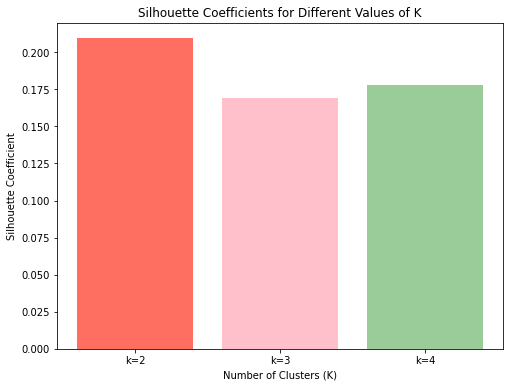

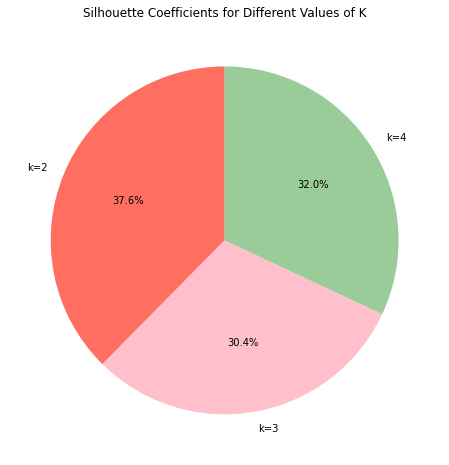

In [8]:
#Representation of Silhouette Coefficients Values
silhouette_coefficients = [clusters_2['silhouette_coefficient'], clusters_3['silhouette_coefficient'], clusters_4['silhouette_coefficient']]
k_values = ['k=2', 'k=3', 'k=4']

colors = ['#FF6F61', 'pink', '#99CC99'] 
plt.figure(figsize=(8, 6))
plt.bar(k_values, silhouette_coefficients, color=colors)
plt.title('Silhouette Coefficients for Different Values of K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Coefficient')
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(silhouette_coefficients, labels=k_values, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Silhouette Coefficients for Different Values of K')
plt.show()

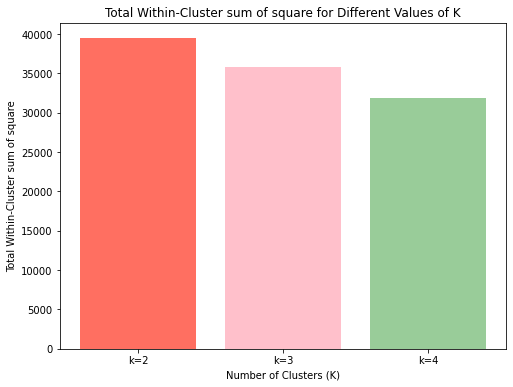

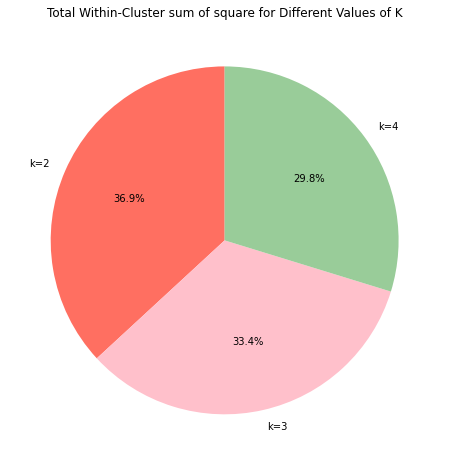

In [9]:
#Representation of Total Within-Cluster sum of square Values
wcss = [clusters_2['wcss'], clusters_3['wcss'], clusters_4['wcss']]
k_values = ['k=2', 'k=3', 'k=4']

plt.figure(figsize=(8, 6))
plt.bar(k_values, wcss, color=colors)
plt.title('Total Within-Cluster sum of square for Different Values of K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Total Within-Cluster sum of square')
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(wcss, labels=k_values, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Total Within-Cluster sum of square for Different Values of K')
plt.show()

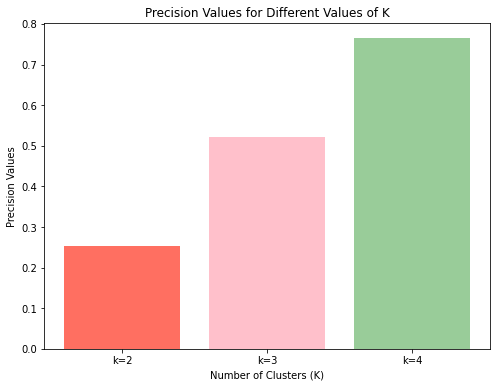

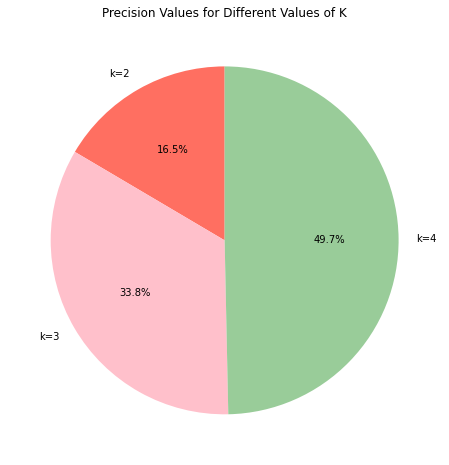

In [10]:
#Representation of Precision Values
precision = [clusters_2['precision'], clusters_3['precision'], clusters_4['precision']]
k_values = ['k=2', 'k=3', 'k=4']
plt.figure(figsize=(8, 6))
plt.bar(k_values, precision, color=colors)
plt.title('Precision Values for Different Values of K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Precision Values')
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(precision, labels=k_values, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Precision Values for Different Values of K')
plt.show()

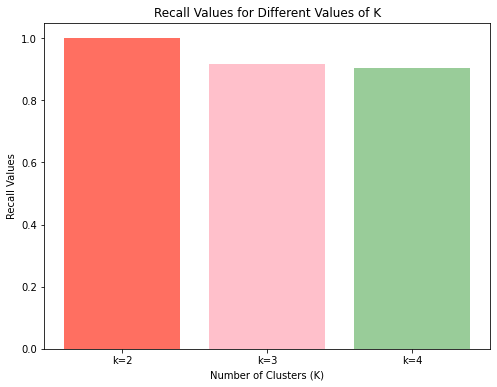

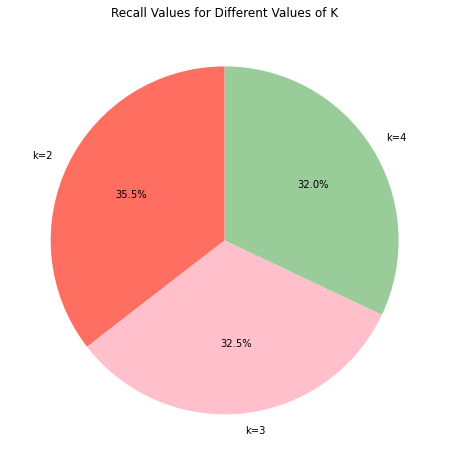

In [11]:
#Representation of Recall Values
recall = [clusters_2['recall'], clusters_3['recall'], clusters_4['recall']]
k_values = ['k=2', 'k=3', 'k=4']
plt.figure(figsize=(8, 6))
plt.bar(k_values, recall, color=colors)
plt.title('Recall Values for Different Values of K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Recall Values')
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(recall, labels=k_values, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Recall Values for Different Values of K')
plt.show()